## Прогностичний аналіз витрат ферми
**Ціль:** передбачити загальні витрати ферми на майбутні роки.

**Методи прогнозу:**
- Лінійна регресія (scikit-learn)
- Нейронна мережа (PyTorch)
- Часовий ряд (Prophet)

## 1. Завантаження та перегляд даних

In [1]:
import pandas as pd

df = pd.read_csv('farm1_data.csv')

display(df)

,farm_id,year,total_salary,total_equipment_maintenance,total_fertilizer_cost,total_expenses
0,1,2010,10116.22,48987.82,0.0000,59104.0400
1,1,2013,46042.85,48987.82,0.0000,95030.6700
2,1,2014,28041.33,48987.82,0.0000,77029.1500
3,1,2015,11433.67,48987.82,0.0000,60421.4900
4,1,2017,48274.31,48987.82,0.0000,97262.1300
5,1,2018,25082.22,48987.82,0.0000,74070.0400
6,1,2020,36811.00,48987.82,4385.8179,90184.6379
7,1,2021,56728.24,48987.82,10795.9806,116512.0406
8,1,2022,15635.57,48987.82,14234.9626,78858.3526
9,1,2023,19566.45,48987.82,13919.6114,82473.8814


## 2. Підготовка даних для моделей

In [2]:
import numpy as np

X = df[["year"]].values  # Рік як ознака
y = df["total_expenses"].values  # Загальні витрати як ціль

## 3. Прогноз за допомогою лінійної регресії (scikit-learn)


Прогноз лінійної регресії на 2025-2027 роки:
Year 2025: 97393.93 грн
Year 2026: 99250.98 грн
Year 2027: 101108.02 грн


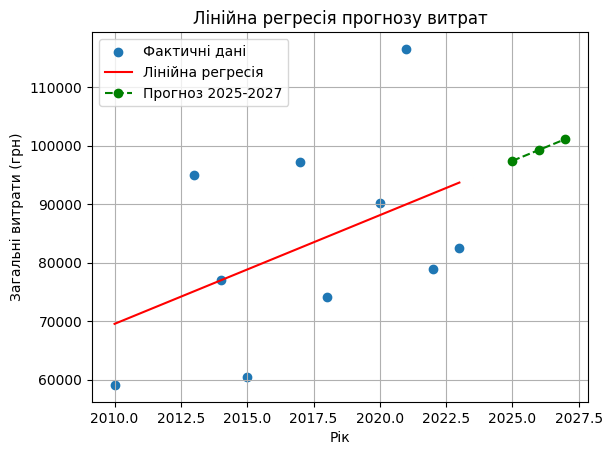

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lr_model = LinearRegression()
lr_model.fit(X, y)

future_years = np.array([[2025], [2026], [2027]])
lr_predictions = lr_model.predict(future_years)

print("\nПрогноз лінійної регресії на 2025-2027 роки:")
for year, pred in zip(future_years.flatten(), lr_predictions):
    print(f"Year {year}: {round(pred, 2)} грн")

plt.scatter(X, y, label="Фактичні дані")
plt.plot(X, lr_model.predict(X), color="red", label="Лінійна регресія")
plt.plot(future_years, lr_predictions, "go--", label="Прогноз 2025-2027")
plt.xlabel("Рік")
plt.ylabel("Загальні витрати (грн)")
plt.title("Лінійна регресія прогнозу витрат")
plt.legend()
plt.grid()
plt.show()

## 4. Прогноз за допомогою нейронної мережі (PyTorch)

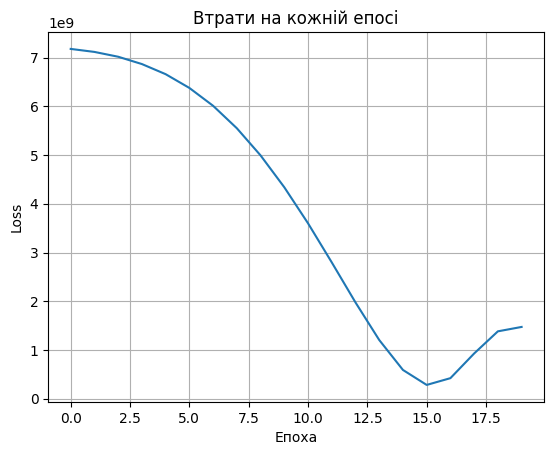


MAE на навчальних даних: 31598.15
RMSE на навчальних даних: 35262.03

Прогноз нейронної мережі на 2025-2027 роки:
Year 2025: 114726.5234375 грн
Year 2026: 114783.171875 грн
Year 2027: 114839.8125 грн


In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)


X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32).view(-1, 1)

model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

epochs = 20
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_torch)
    loss = loss_fn(output, y_torch)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

plt.plot(losses)
plt.title("Втрати на кожній епосі")
plt.xlabel("Епоха")
plt.ylabel("Loss")
plt.grid()
plt.show()

train_preds = model(X_torch).detach().numpy()

mae = mean_absolute_error(y, train_preds)
rmse = np.sqrt(mean_squared_error(y, train_preds))

print(f"\nMAE на навчальних даних: {round(mae, 2)}")
print(f"RMSE на навчальних даних: {round(rmse, 2)}")

future_years_torch = torch.tensor(future_years, dtype=torch.float32)
nn_predictions = model(future_years_torch).detach().numpy().flatten()

print("\nПрогноз нейронної мережі на 2025-2027 роки:")
for year, pred in zip(future_years.flatten(), nn_predictions):
    print(f"Year {year}: {round(pred, 2)} грн")


## 5. Прогноз за допомогою Prophet

In [8]:
!pip3 install prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.6-py3-none-macosx_11_0_arm64.whl (8.2 MB)
  Using cached holidays-0.71-py3-none-any.whl (917 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
  Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/Users/denys.koval/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:46:01 - cmdstanpy - INFO - Chain [1] start processing
10:46:02 - cmdstanpy - INFO - Chain [1] done processing
/Users/denys.koval/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


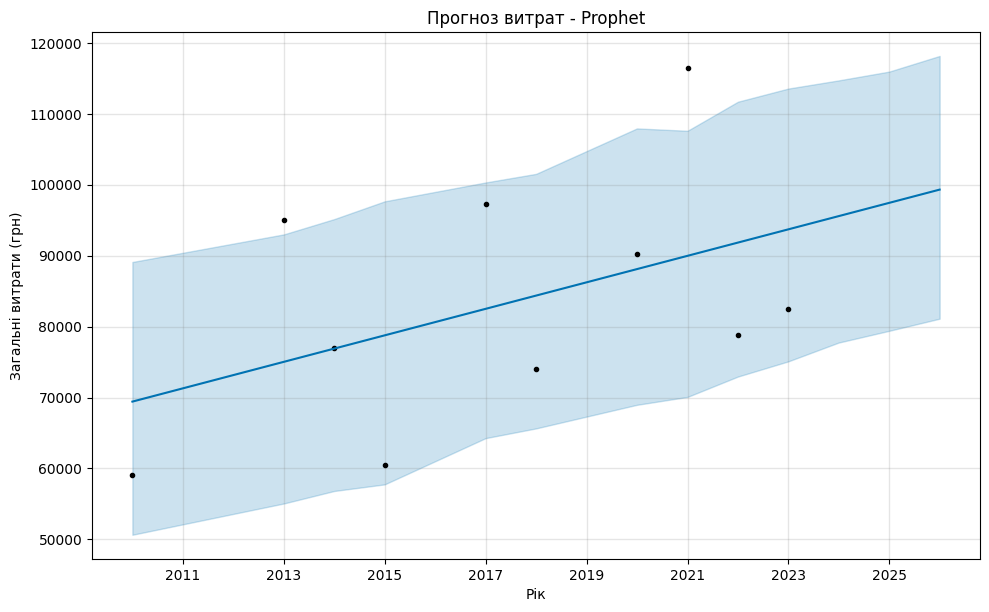


Прогноз Prophet на 2025-2027 роки:


,ds,yhat
10,2023-12-31,95564.706797
11,2024-12-31,97436.112882
12,2025-12-31,99302.405836


In [9]:
from prophet import Prophet

df_prophet = df[["year", "total_expenses"]].rename(
    columns={"year": "ds", "total_expenses": "y"}
)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")

prophet_model = Prophet(yearly_seasonality=False, daily_seasonality=False)
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=3, freq="Y")
forecast = prophet_model.predict(future)

fig = prophet_model.plot(forecast)
plt.title("Прогноз витрат - Prophet")
plt.xlabel("Рік")
plt.ylabel("Загальні витрати (грн)")
plt.show()

print("\nПрогноз Prophet на 2025-2027 роки:")
display(forecast[["ds", "yhat"]].tail(3))


# Висновки

- Лінійна регресія показує стабільний тренд витрат ферми з певним щорічним приростом.
- Нейронна мережа краще ловить нелінійні коливання в даних.
- Prophet показує тренд та враховує можливі сезонні коливання.

Кожен метод має свої переваги:
- Лінійна регресія — швидкість і простота.
- Нейронна мережа — гнучкість при складних залежностях.
- Prophet — ідеально для часових рядів із сезонністю.